Department of Physics, University of Pisa (AA 2022-2023)

### Multimessenger Physics Laboratory tutorial series



## Exercise 1 - Reading and manipulating CSV files
#### (M. Razzano, Feb 10, 2023)

In this exercise you will have to read and manipulate a file coming from the Exoplanet catalog

### Basic Setup
In the cell below you should import the modules that you think you will require...

In [11]:
import numpy
import os   
import sys
import numpy as np #Numerical Python
import matplotlib.pyplot as plt 

### Open and explore  data file

The file, named catalog_exoplanets_nasa.csv, is already in the data directory. Define work, data and results directories, then open the file.
Open it and look how many lines are there, check if there are headers etc...
How many columns are there? 

In [12]:
# Let's define te directory where you are with the "get current working directory" command...
work_dir = os.getcwd()
print("I am in dir %s" % work_dir)

#We can go up by using the path.dirname
main_dir =os.path.dirname(work_dir)
print("Main directory is %s" % main_dir)

#We can then define the data directory using the os.path.join command
data_dir = os.path.join(main_dir,"data")
print("data dir is %s" % data_dir)

#..and we can define some output directory with the results
results_dir = os.path.join(main_dir,"results")

#if the directory does not exist, you can create it...
if not os.path.exists(results_dir):
    os.mkdir(results_dir)
    print("Directory %s created !" % results_dir)

I am in dir /home/jovyan/astrophysics_2023/homework/homework-01---data-input-output-with-python-hussainkitagawa/exercises
Main directory is /home/jovyan/astrophysics_2023/homework/homework-01---data-input-output-with-python-hussainkitagawa
data dir is /home/jovyan/astrophysics_2023/homework/homework-01---data-input-output-with-python-hussainkitagawa/data


### Save in a list of arrays

Read the data file and for each column create a numpy array. 
Some quantities are not expressed in SI Units. Can you convert them, e.g. from AU to m, or from years to seconds?

In [13]:
#File name in data direcory
data_filename = "catalog_exoplanets_nasa.csv"
#Read file
data_filename = open(os.path.join(data_dir,data_filename),"r")  #r means reading mode

#Readlines: a list with a line each
divine_lines = data_filename.readlines()

#count total line in file
total = len(divine_lines)
print("** Total lines in file = %d" % total)

#print the first 20 lines
#print(divine_lines[0:20])


#loop for the first 10 lines; the line number; the length of each line and the line content 
#for li in range(10):
    #print(li,len(divine_lines[li]),divine_lines[li])


#loop for the first 10 lines: create an output list with only the lines that we want
out_list=[]
#for li in range(10): #read first 10 lines
for li in range(220):# read all lines
    line = divine_lines[li].strip("\n")
    if (len(line)>0): #check if value exist
        #comments lines start with #
        if (line[0]!="#"):
          #print(line)
          out_list.append(line)

print("** File contains %d data lines" % len(out_list))

#use the first line as header containing the column names
header = out_list[0]
column_names = header.split(",")
print("** header contains %d columns" % len(column_names))
print(column_names)

#create and init a dictionary of lists:
data_dict={}
for ci in range(len(column_names)):
    data_dict[column_names[ci]]=[]


#start from index 1 (skip the first line containing the headers)
for ri in range(1,len(out_list)):
    data_line = out_list[ri].split(",")
    #print("Processing row %d" % ri)
    for ci in range(len(column_names)):
        val = data_line[ci]
        #Row ID
        #if  column_names[ci] ==  "rowid":
            #print('rowid = ', val)
        #check if string is empty
        if data_line[ci] == "": 
            data_line[ci] = '0' #fill 0
            val = int(data_line[ci])
            
        #Change the unit;            
        if column_names[ci] == "pl_orbper": # Orbital Period [days]
            val = float(data_line[ci])*60*60*24 #day -> second
            #print('pl_orbper = ', val)
        if column_names[ci] == "pl_massj": # Planet mass (Jupiter mass)
            val = float(data_line[ci])*1.898*10**27 #in kg
            #print('pl_massj = ', val)
        if column_names[ci] == "pl_masse": # Planet mass (Earth mass)
            val = float(data_line[ci])*5.972168*10*24 #in kg 
            #print('pl_masse = ', val)  
        if column_names[ci] == "pl_rade": # Planet radius (Earth radius)
            val = float(data_line[ci])*6378*10**3 #in meter
            #print('pl_rade = ', val)
        if column_names[ci] == "pl_ratdor": # Ratio of Distance to Stellar Radius
            val = float(data_line[ci])
            #print('pl_ratdor = ', val)
            
        data_dict[column_names[ci]].append(val)

#print pl_hostname
#print(data_dict["pl_massj"])   

** Total lines in file = 3985
** File contains 74 data lines
** header contains 143 columns
['rowid', 'pl_hostname', 'pl_letter', 'pl_name', 'pl_discmethod', 'pl_pnum', 'pl_orbper', 'pl_orbsmax', 'pl_orbeccen', 'pl_orbincl', 'pl_bmassj', 'pl_bmassprov', 'pl_radj', 'pl_dens', 'pl_ttvflag', 'pl_kepflag', 'pl_k2flag', 'pl_nnotes', 'ra_str', 'ra', 'dec_str', 'dec', 'st_dist', 'st_optmag', 'st_optband', 'gaia_gmag', 'st_teff', 'st_mass', 'st_rad', 'rowupdate', 'pl_tranflag', 'pl_rvflag', 'pl_imgflag', 'pl_astflag', 'pl_omflag', 'pl_cbflag', 'pl_angsep', 'pl_orbtper', 'pl_orblper', 'pl_rvamp', 'pl_eqt', 'pl_insol', 'pl_massj', 'pl_msinij', 'pl_masse', 'pl_msinie', 'pl_bmasse', 'pl_rade', 'pl_rads', 'pl_trandep', 'pl_trandur', 'pl_tranmid', 'pl_tsystemref', 'pl_imppar', 'pl_occdep', 'pl_ratdor', 'pl_ratror', 'pl_def_reflink', 'pl_disc', 'pl_disc_reflink', 'pl_locale', 'pl_facility', 'pl_telescope', 'pl_instrument', 'pl_status', 'pl_mnum', 'pl_st_npar', 'pl_st_nref', 'pl_pelink', 'pl_edelink',

### Do some plotting

Choose few quantities and make a scatter plot and a histogram.

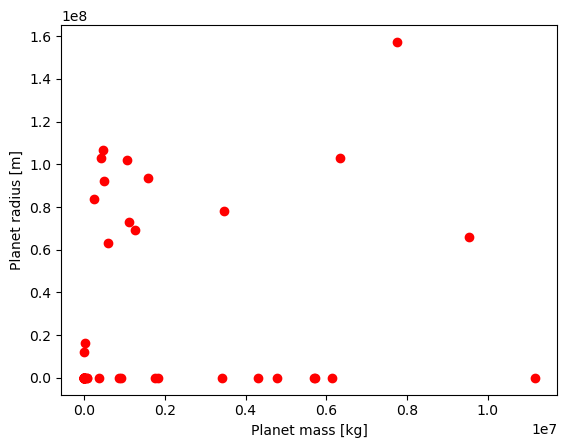

In [15]:
#convert list to numpy arrays
data_dict["pl_orbper"]=np.asarray(data_dict["pl_orbper"])# Orbital Period [days]
data_dict["pl_massj"]=np.asarray(data_dict["pl_massj"])# Planet mass (Jupiter mass)
data_dict["pl_masse"]=np.asarray(data_dict["pl_masse"])# Planet mass (Earth mass)
data_dict["pl_rade"]=np.asarray(data_dict["pl_rade"])# Planet radius (Earth radius)
data_dict["pl_ratdor"]=np.asarray(data_dict["pl_ratdor"])# Ratio of Distance to Stellar Radius

#scatter plot
plt.scatter(data_dict["pl_masse"],data_dict["pl_rade"],marker="o",color="red",)
plt.xlabel("Planet mass [kg]")
plt.ylabel("Planet radius [m]")

save_fig = os.path.join(results_dir, 'Planet_mass_radius.png')
plt.savefig(save_fig)

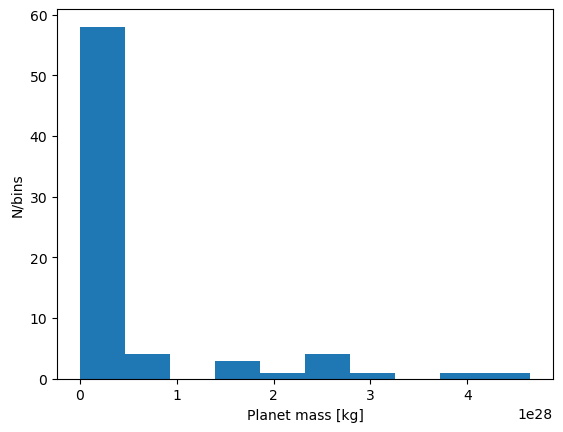

In [16]:
#histograms
plt.hist(data_dict["pl_massj"])
plt.ylabel("N/bins")
plt.xlabel("Planet mass [kg]")
save_fig = os.path.join(results_dir, 'Planet_mass.png')
plt.savefig(save_fig)

### Save in an output file

Are you able to save the data in a more readable file? I.e. a file with no comments and just the headers. Is the data in SI format?

In [17]:
#define the filename, use the results path
test_out_filename = os.path.join(results_dir,"catalog_exoplanets_nasa.txt")

#use the open command
test_out_file = open(test_out_filename,"w")  #writing mode

#wrtite in output_file
for i in range(len(out_list)):
    test_out_file.write(out_list[i])  
    
#IMPORTANT: don't forget to close the file!
test_out_file.close()

### Final steps
Congratulations! Don't forget to save your work to Github (using git commit + git push)